In [316]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [317]:
df = pd.read_csv("E:/job update/practice/titanic/titanic_prediction_using_various_models/data/train.csv")

In [318]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [319]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [321]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [322]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


Onservations:
    1. Drop name as its not usefull for the machine learning process but the title may be useful.
    2. Convert the categorical Sex data into numeric data.
    3. Ticket data is highly cardinal so its not useful.
    4. Cabin data has many null values.
    5. PassengerId may be dropped from training dataset as it does not contribute to survival.

In [323]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [324]:
df[["Sex", "Survived"]].groupby(["Sex"], as_index=False ).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


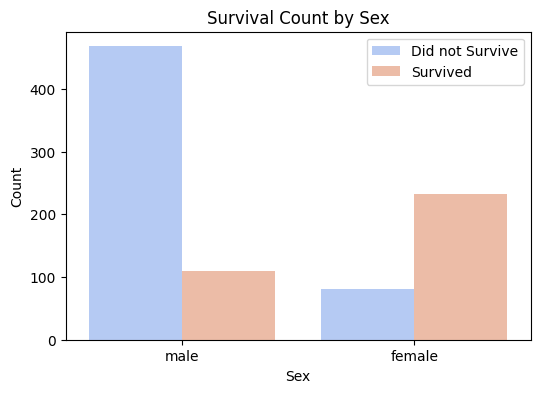

In [325]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Sex", hue="Survived", palette="coolwarm")
plt.title("Survival Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(["Did not Survive", "Survived"])
plt.show()


In [326]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


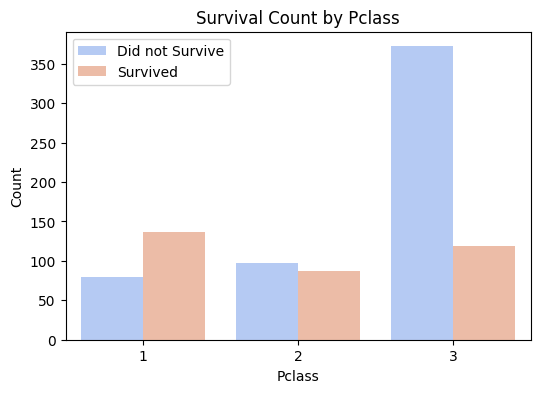

In [327]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Pclass", hue="Survived", palette="coolwarm")
plt.title("Survival Count by Pclass")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.legend(["Did not Survive", "Survived"])
plt.show()

In [328]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by ="Survived", ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


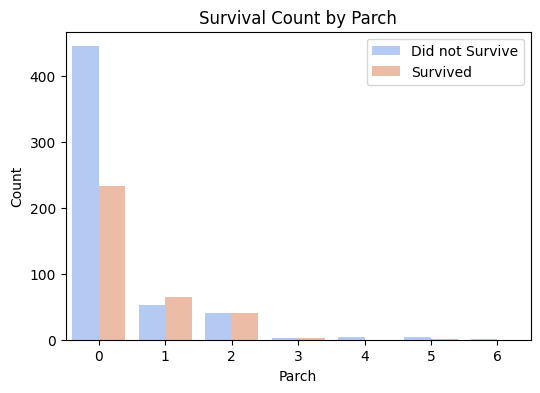

In [329]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Parch", hue="Survived", palette="coolwarm")
plt.title("Survival Count by Parch")
plt.xlabel("Parch")
plt.ylabel("Count")
plt.legend(["Did not Survive", "Survived"])
plt.show()

In [330]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


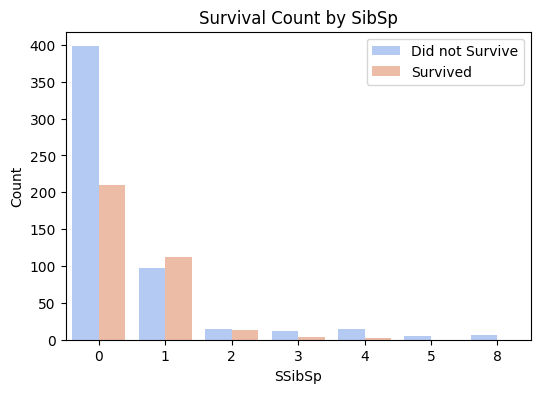

In [331]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="SibSp", hue="Survived", palette="coolwarm")
plt.title("Survival Count by SibSp")
plt.xlabel("SSibSp")
plt.ylabel("Count")
plt.legend(["Did not Survive", "Survived"])
plt.show()

Observations :
 1. The upper-class passengers (Pclass=1) were more likely to have survived.
 2. Women (Sex=female) were more likely to have survived.

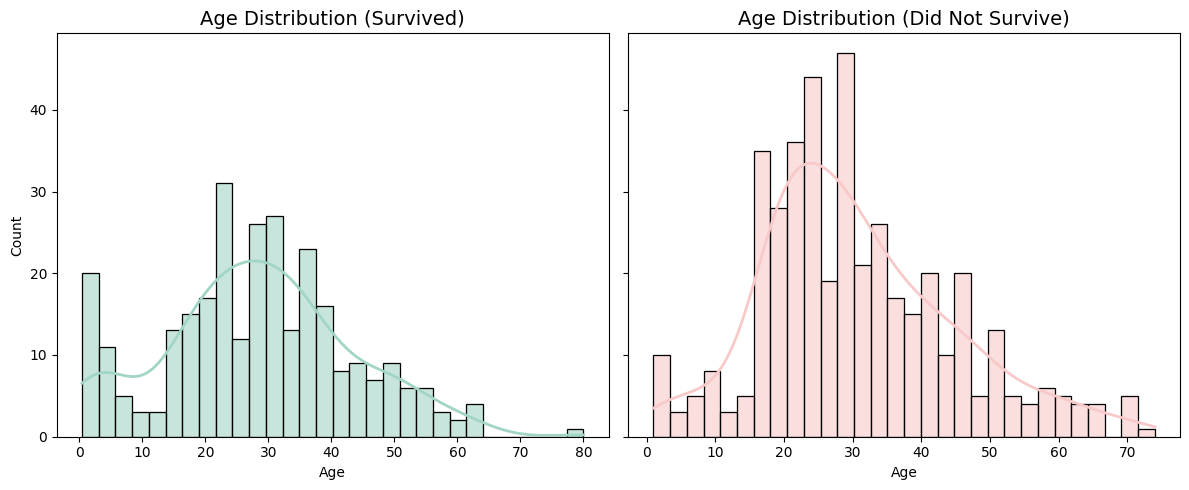

In [332]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)  # 1 row, 2 columns

# Histogram for Survived = 1 
sns.histplot(df[df["Survived"] == 1]["Age"], bins=30, kde=True, color="#A2D5C6", edgecolor="black", alpha=0.6,
             line_kws={"color": "darkgreen", "linewidth": 2}, ax=axes[0])
axes[0].set_title("Age Distribution (Survived)", fontsize=14)
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")

# Histogram for Survived = 0 
sns.histplot(df[df["Survived"] == 0]["Age"], bins=30, kde=True, color="#F7CAC9", edgecolor="black", alpha=0.6,
             line_kws={"color": "darkred", "linewidth": 2}, ax=axes[1])
axes[1].set_title("Age Distribution (Did Not Survive)", fontsize=14)
axes[1].set_xlabel("Age")
axes[1].set_ylabel("")

# Adjust layout
plt.tight_layout()
plt.show()




Observation of Histogram :
  1. Age group with the most frequency of people is 15- 35.
  2. The age group with the most death is 15-30.
  3. Infants had a good survial rate.
  4. Outlier detected as the oldest person survived but there is no survial in the range 65-80 but one.

Decisions :
 1. Age is proven to be an important feature as survival and death have a pattern according to the age feature.
 2. Missing values must be filled to make the age feature trainig ready.
 3. Corelation between the age and other features are to be explored.

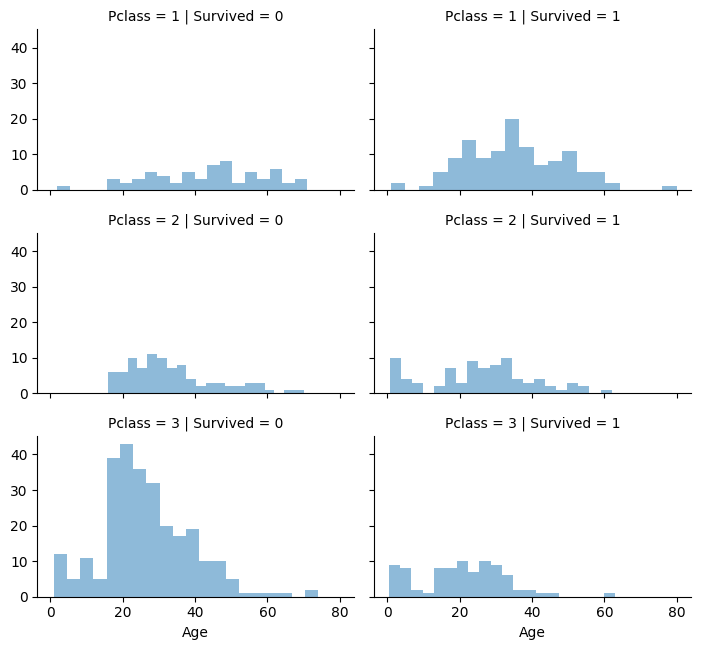

In [333]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
plt.show()

Obseravtion:

    1. Pclass = 3 had the most amount of people and most of the people did not survive.
    2. Pclass = 1 had the most amount of people who survived.
    3. Infants over all had much higher survival rate.

Decision:
    Pclass is an important feature for model training.

e:\job update\practice\titanic\titanic_prediction_using_various_models\myenv\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
e:\job update\practice\titanic\titanic_prediction_using_various_models\myenv\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


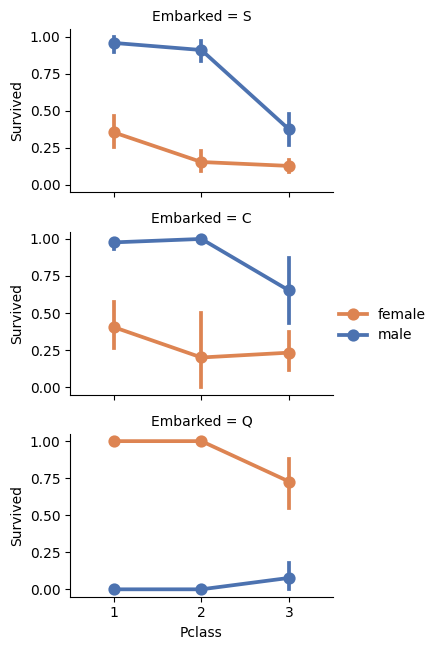

In [334]:
grid = sns.FacetGrid(df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()
plt.show()

Observations:

    1. Females have over all better survial rate .
    3. Males where Embarked = C have a high survival rate.
    4. In Embarked = C and males have a higher survival rate than females.

Decision: 

    Add Embarked as a feature for model training.

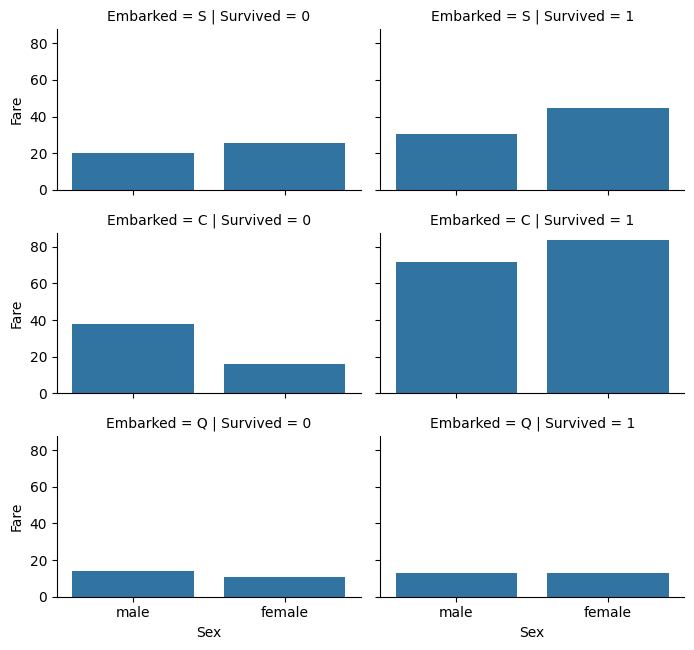

In [335]:
grid = sns.FacetGrid(df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', order=['male', 'female'], errorbar=None)
plt.show()

Observations:

    1. Higher fare corelates to higher survival rate.
    2. Port of embarkation correlates with survival rates.

In [336]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [337]:
pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [338]:

df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

In [339]:
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [340]:
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by ="Survived", ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [341]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

df['Title'] = df['Title'].map(title_mapping)
df['Title'] = df['Title'].fillna(0)

In [342]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [343]:
df = df.drop(['Name', 'PassengerId','Cabin','Ticket'], axis=1)

In [344]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


In [345]:
df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [346]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [347]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [348]:
# Loop to populate guess_ages with the median for each Sex and Pclass
for i in range(0, 2):  
    for j in range(0, 3):
        guess_df = df[(df['Sex'] == i) & (df['Pclass'] == j+1)]['Age'].dropna()
        age_guess = guess_df.median()
        guess_ages[i, j] = int(age_guess / 0.5 + 0.5) * 0.5  # Round to nearest 0.5

# Fill missing values
for i in range(0, 2):
    for j in range(0, 3):
        df.loc[(df['Age'].isnull()) & (df['Sex'] == i) & (df['Pclass'] == j+1), 'Age'] = guess_ages[i, j]

         

In [349]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [350]:
# Create Age bands by splitting 'Age' into 5 bins
df['AgeBand'] = pd.cut(df['Age'], 5)

# Calculate average survival rate for each AgeBand and sort by AgeBand
df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


C:\Users\acer\AppData\Local\Temp\ipykernel_23648\833569265.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.336714
2,"(32.252, 48.168]",0.412844
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [351]:
df.loc[ df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16.336) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32.252) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48.168) & (df['Age'] <= 64), 'Age'] = 3
df.loc[df['Age'] > 64, 'Age'] = 4

df['Age'] = df['Age'].astype(int) 

In [352]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.336, 32.252]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.252, 48.168]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.336, 32.252]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.252, 48.168]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.252, 48.168]"


In [353]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [354]:
df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [355]:
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

In [356]:

df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [357]:
df = df.drop(['Parch', 'SibSp', 'FamilySize','AgeBand'], axis=1)

In [358]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [359]:
df['Age*Class'] = df.Age * df.Pclass
df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [360]:
freq_port = df.Embarked.dropna().mode()[0]
freq_port

'S'

In [361]:
df['Embarked'] = df['Embarked'].fillna(freq_port)

In [362]:
df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [363]:
df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [364]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [365]:
df['Fare'].fillna(df['Fare'].dropna().median(), inplace=True)
df.head()

C:\Users\acer\AppData\Local\Temp\ipykernel_23648\2502668776.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].dropna().median(), inplace=True)


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [366]:
df['FareBand'] = pd.qcut(df['Fare'], 4)
df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_23648\3650593465.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [367]:
df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
df.loc[ df['Fare'] > 31, 'Fare'] = 3
df['Fare'] = df['Fare'].astype(int)


In [368]:
df.drop(['FareBand'], axis=1,inplace=True)

In [369]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


In [370]:
df['Age'] = df['Age'].astype(int)

In [371]:
df['Age*Class'] = df['Age*Class'].astype(int)

In [372]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


In [373]:
##df.to_csv('data.csv',index=False)